In [1]:
import tensorflow.keras as keras

from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.
C:\Users\Aryan Raj\anaconda3\envs\new_env\lib\site-packages\keras\datasets\reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Aryan Raj\anaconda3\envs\new_env\lib\site-packages\keras\datasets\reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [4]:
train_labels[10]

3

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
def to_one_hot (labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, labels] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [8]:
# method 2 to vectorize labels for one_hot

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [33]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [34]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 163us/step - loss: 2.6220 - accuracy: 0.4995 - val_loss: 1.7235 - val_accuracy: 0.6320
Epoch 2/20
7982/7982 [==============================] - 1s 111us/step - loss: 1.4117 - accuracy: 0.7027 - val_loss: 1.3130 - val_accuracy: 0.6940
Epoch 3/20
7982/7982 [==============================] - 1s 110us/step - loss: 1.0460 - accuracy: 0.7859 - val_loss: 1.1492 - val_accuracy: 0.7520
Epoch 4/20
7982/7982 [==============================] - 1s 107us/step - loss: 0.8246 - accuracy: 0.8266 - val_loss: 1.0330 - val_accuracy: 0.7930
Epoch 5/20
7982/7982 [==============================] - 1s 107us/step - loss: 0.6587 - accuracy: 0.8618 - val_loss: 0.9754 - val_accuracy: 0.8040
Epoch 6/20
7982/7982 [==============================] - 1s 110us/step - loss: 0.5254 - accuracy: 0.8918 - val_loss: 0.9598 - val_accuracy: 0.7910
Epoch 7/20
7982/7982 [==============================] - 1s 108us/step - loss

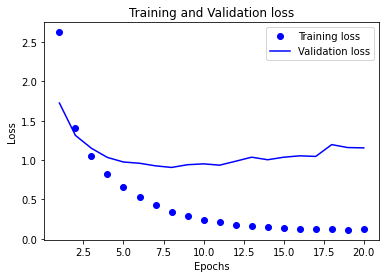

In [18]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

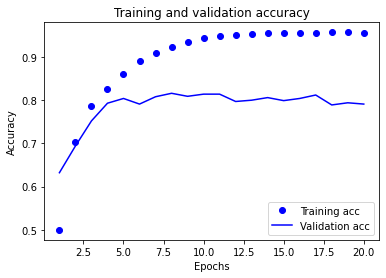

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 124us/step - loss: 2.5868 - accuracy: 0.5167 - val_loss: 1.7127 - val_accuracy: 0.6440
Epoch 2/9
7982/7982 [==============================] - 1s 111us/step - loss: 1.4193 - accuracy: 0.7026 - val_loss: 1.3245 - val_accuracy: 0.7090
Epoch 3/9
7982/7982 [==============================] - 1s 112us/step - loss: 1.0591 - accuracy: 0.7709 - val_loss: 1.1366 - val_accuracy: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 112us/step - loss: 0.8260 - accuracy: 0.8221 - val_loss: 1.0364 - val_accuracy: 0.7860
Epoch 5/9
7982/7982 [==============================] - 1s 115us/step - loss: 0.6581 - accuracy: 0.8623 - val_loss: 0.9628 - val_accuracy: 0.8070
Epoch 6/9
7982/7982 [==============================] - 1s 112us/step - loss: 0.5279 - accuracy: 0.8929 - val_loss: 0.9442 - val_accuracy: 0.8030
Epoch 7/9
7982/7982 [==============================] - 1s 113us/step - loss: 0.425

In [27]:
predictions = model.predict(x_test)

In [28]:
predictions[0].shape

(46,)

In [29]:
np.sum(predictions[0])

0.99999994

In [31]:
np.argmax(predictions[0])

3